### Downloading MNIST dataset with Scikit-Learn 

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
len(mnist.data)

70000

In [3]:
X, y = mnist["data"], mnist["target"]

#### 70 000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

#### Let’s look at one digit from the dataset. All we need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function:

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
some_digit = X[0]

In [8]:
some_digit.shape

(784,)

In [9]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
some_digit_image = some_digit.reshape(28, 28)

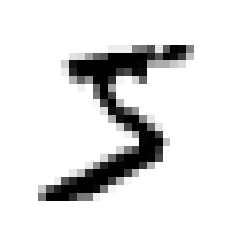

In [11]:
plt.imshow(some_digit_image, cmap="binary") 
plt.axis("off")
plt.show()

In [12]:
# checking what this number is. Looks like 5 but I dunno
y[0]

'5'

#### the label is a string. Most ML algorithms expect numbers, so let’s cast y to integer:

In [13]:
import numpy as np
y = y.astype(np.uint8)

In [14]:
y[0]

5

#### One should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Let's identify only one digit - Binary Classification. For instance, 5. So, Binary Class is 5 or not 5

In [22]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [24]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [25]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [26]:
# Using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
sgd_clf.predict([some_digit])

array([ True])

#### Using the cross_val_score() function to evaluate SGDClassifier model, using K-fold cross-validation with three folds. 

In [28]:
from sklearn.model_selection import cross_val_score


cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Creating the dumbest classifier that just classifies every single image in the “not-5” class. This is done to show, that when classifing only one image we can basically all the time be saying 'it ain't that image' and be 90% right

In [29]:
from sklearn.base import BaseEstimator

In [30]:
class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [31]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])